# Speed Dating

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('speeddating.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 123 entries, has_null to match
dtypes: float64(59), object(64)
memory usage: 7.9+ MB


In [3]:
null_counts = data.isnull().sum()

# calculate the percentage of null values in each column
null_percentages = (null_counts / len(data)) * 100

# iterate over the null value percentages and print them
for col_name, percentage in null_percentages.items():
    print(f"{col_name}: {percentage:.2f}%")

has_null: 0.00%
wave: 0.00%
gender: 0.00%
age: 1.13%
age_o: 1.24%
d_age: 0.00%
d_d_age: 0.00%
race: 0.00%
race_o: 0.00%
samerace: 0.00%
importance_same_race: 0.94%
importance_same_religion: 0.94%
d_importance_same_race: 0.00%
d_importance_same_religion: 0.00%
field: 0.00%
pref_o_attractive: 1.06%
pref_o_sincere: 1.06%
pref_o_intelligence: 1.06%
pref_o_funny: 1.17%
pref_o_ambitious: 1.28%
pref_o_shared_interests: 1.54%
d_pref_o_attractive: 0.00%
d_pref_o_sincere: 0.00%
d_pref_o_intelligence: 0.00%
d_pref_o_funny: 0.00%
d_pref_o_ambitious: 0.00%
d_pref_o_shared_interests: 0.00%
attractive_o: 2.53%
sinsere_o: 3.43%
intelligence_o: 3.65%
funny_o: 4.30%
ambitous_o: 8.62%
shared_interests_o: 12.84%
d_attractive_o: 0.00%
d_sinsere_o: 0.00%
d_intelligence_o: 0.00%
d_funny_o: 0.00%
d_ambitous_o: 0.00%
d_shared_interests_o: 0.00%
attractive_important: 0.94%
sincere_important: 0.94%
intellicence_important: 0.94%
funny_important: 1.06%
ambtition_important: 1.18%
shared_interests_important: 1.44%
d

In [4]:
#Columns dropping

cols_to_drop = null_percentages[null_percentages > 5].index
data = data.drop(cols_to_drop, axis=1)
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 8377
Columns: 117 entries, has_null to match
dtypes: float64(53), object(64)
memory usage: 6.4+ MB


In [5]:
# Categorical atributes

'''
All categorical attributes are differences of preferences of
previous attributes between self and partner, with the exception of
'match' and decisions.
'''
cat_att = data.select_dtypes(include='object').columns
matchAtt = ['match']
cat_cols_to_drop = list(set(cat_att) - set(matchAtt))
print(f"Categorical columns: {cat_att}")
data1= data.drop(cat_cols_to_drop, axis=1)
data2=data.drop(['decision','decision_o'],axis=1)



Categorical columns: Index(['has_null', 'gender', 'd_d_age', 'race', 'race_o', 'samerace',
       'd_importance_same_race', 'd_importance_same_religion', 'field',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important',
       'd_sincere_important', 'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_theat

In [6]:
data1['match'] = data['match'].replace({'b\'0\'': 0, 'b\'1\'': 1})
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 8377
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   wave                           7079 non-null   float64
 1   age                            7079 non-null   float64
 2   age_o                          7079 non-null   float64
 3   d_age                          7079 non-null   float64
 4   importance_same_race           7079 non-null   float64
 5   importance_same_religion       7079 non-null   float64
 6   pref_o_attractive              7079 non-null   float64
 7   pref_o_sincere                 7079 non-null   float64
 8   pref_o_intelligence            7079 non-null   float64
 9   pref_o_funny                   7079 non-null   float64
 10  pref_o_ambitious               7079 non-null   float64
 11  pref_o_shared_interests        7079 non-null   float64
 12  attractive_o                   7079 non-null   f

In [7]:
data2 = pd.get_dummies(data, columns=cat_cols_to_drop)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 8377
Columns: 495 entries, wave to d_expected_happy_with_sd_people_b'[7-10]'
dtypes: float64(53), object(1), uint8(441)
memory usage: 5.9+ MB


In [8]:
'''
Data 1 removes differences columns and decision columns.
Data 2 keeps them and uses dummies
'''

'\nData 1 removes differences columns and decision columns.\nData 2 keeps them and uses dummies\n'

## Comparison of Models

In [9]:
df = data1

X= df[['age', 'attractive']]
fullX= df.drop('match', axis=1)
y=df['match']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression(random_state=16)

# fit the model with data
logisticModel.fit(X_train, y_train)

y_pred = logisticModel.predict(X_test)
logAccuracy = logisticModel.score(X_test, y_test)
print(logAccuracy)


0.8305084745762712


In [11]:
# Cross Validation
from sklearn.model_selection import cross_val_score, GridSearchCV

logScores = cross_val_score(logisticModel, X, y, cv=5)
logMeanScore=logScores.mean()

print(f"Model scores: {logScores}")
print(f"Mean score: {logMeanScore}")

Model scores: [0.82556497 0.82556497 0.82556497 0.82556497 0.82614841]
Mean score: 0.8256816593799285


### Tree-based models

In [12]:
df = data1

fullX= df.drop('match', axis=1)
y=df['match']
X_train, X_test, y_train, y_test = train_test_split(fullX, y, test_size=0.25, random_state=0)


#### Decision Trees

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(fullX, y, test_size=0.25, random_state=0)

treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)
y_pred = treeModel.predict(X_test)

treeAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {treeAccuracy}")

Accuracy score: 0.7847457627118644


In [14]:
# Cross Validation
treeScores = cross_val_score(treeModel, X, y, cv=5)
treeMeanScore=treeScores.mean()
print(f"Model scores: {treeScores}")
print(f"Mean score: {treeMeanScore}")

Model scores: [0.82344633 0.81567797 0.81285311 0.82062147 0.82614841]
Mean score: 0.8197494559900982


In [15]:
#Tuned Decision Tree

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a decision tree classifier object
bestTreeModel = DecisionTreeClassifier()

# Create a GridSearchCV object and fit it to the training data
gridSearchTree = GridSearchCV(bestTreeModel, param_grid, cv=5)
gridSearchTree.fit(X_train, y_train)

print("Tuned Decision Tree")

# Print the best hyperparameters and score
print(f"Best parameters: {gridSearchTree.best_params_}")
print(f"Best score: {gridSearchTree.best_score_}")

# Get predictions on the test data using the best model
bestModel = gridSearchTree.best_estimator_
y_pred = bestModel.predict(X_test)

# Calculate accuracy score on test data
bestTreeAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {bestTreeAccuracy}")

Tuned Decision Tree
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.8321739253910694
Accuracy score: 0.8525423728813559


#### Bagging

In [16]:
from sklearn.ensemble import BaggingClassifier

base_estimator = DecisionTreeClassifier()
bagging = BaggingClassifier(estimator=base_estimator, n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
baggingAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {baggingAccuracy}")

Accuracy score: 0.8615819209039548


In [17]:
# Cross Validation
baggingScore = cross_val_score(bagging, fullX, y, cv=5)
baggingMeanScore=baggingScore.mean()
print(f"Model scores: {baggingScore}")
print(f"Mean score: {baggingMeanScore}")

Model scores: [0.79237288 0.83474576 0.83898305 0.84110169 0.84240283]
Mean score: 0.8299212433371265


In [18]:
# Tuned Bagging

param_grid = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 1.0],
    "max_features": [0.5, 1.0],
    "random_state": [0],
}

grid_search = GridSearchCV(bagging, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

bestModel = gridSearchTree.best_estimator_
y_pred = bestModel.predict(X_test)

bestBaggingAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {bestTreeAccuracy}")

Best parameters: {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100, 'random_state': 0}
Accuracy score: 0.8525423728813559


#### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rForest = RandomForestClassifier(n_estimators=100, random_state=42)
rForest.fit(X_train, y_train)
y_pred = rForest.predict(X_test)

forestAccuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', forestAccuracy)

Accuracy: 0.8587570621468926


In [20]:
rForestScore = cross_val_score(rForest, fullX, y, cv=5)
forestMeanScore=rForestScore.mean()
print(f"Model scores: {rForestScore}")
print(f"Mean score: {rForestScore.mean()}")

Model scores: [0.84251412 0.8460452  0.83403955 0.85169492 0.84028269]
Mean score: 0.8429152941646205


In [21]:
# Tuned Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rForest = RandomForestClassifier(random_state=42)

gridSearchForest = GridSearchCV(
    estimator=rForest,
    param_grid=param_grid,
    cv=5,
)

gridSearchForest.fit(X_train, y_train)

print(f"Best parameters: {gridSearchForest.best_params_}")


y_pred = gridSearchForest.predict(X_test)
bestForestAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {bestBaggingAccuracy}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy score: 0.8525423728813559


### SVM - Hyperbolic tangent kernel Function

Below we see the projection of a non-linearly separable data in 2d and 3d trough the Hyperbolic tangent function

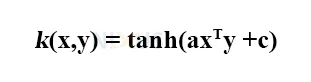
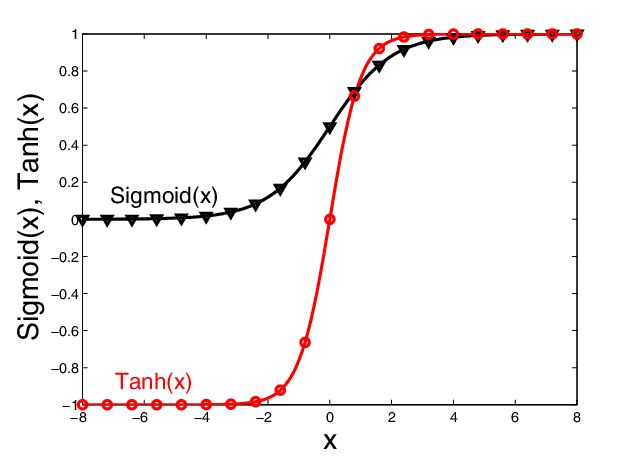


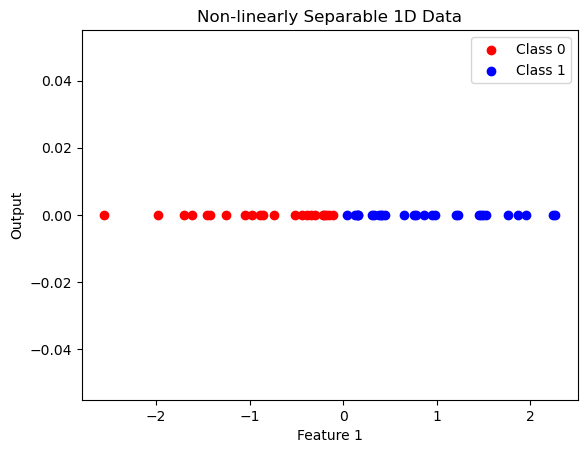

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate random 1D points
X = np.random.normal(size=(50, 1))
y = np.array([0 if x < 0 else 1 for x in X])

# Plot points with different colors for each class
plt.scatter(X[y==0], np.zeros((len(X[y==0]), 1)), c='red', label='Class 0')
plt.scatter(X[y==1], np.zeros((len(X[y==1]), 1)), c='blue', label='Class 1')

# Add legend and labels
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Output')
plt.title('Non-linearly Separable 1D Data')

# Display plot
plt.show()


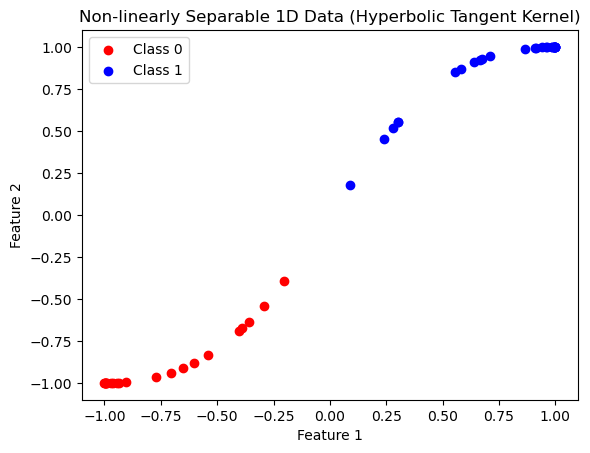

In [23]:
def hyperbolic_tangent_kernel(X1, X2, alpha=1, beta=0):
    return np.tanh(alpha * np.dot(X1, X2.T) + beta)

# Compute kernel matrix
# K = hyperbolic_tangent_kernel(X, X)

# Project points into high-dimensional feature space
Z = np.zeros((len(X), 10))
for i in range(len(X)):
    for j in range(10):
        Z[i, j] = np.tanh(2 * (j+1) * X[i])

# Plot points in feature space with different colors for each class
plt.scatter(Z[y==0, 0], Z[y==0, 1], c='red', label='Class 0')
plt.scatter(Z[y==1, 0], Z[y==1, 1], c='blue', label='Class 1')

# Add legend and labels
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linearly Separable 1D Data (Hyperbolic Tangent Kernel)')

# Display plot
plt.show()


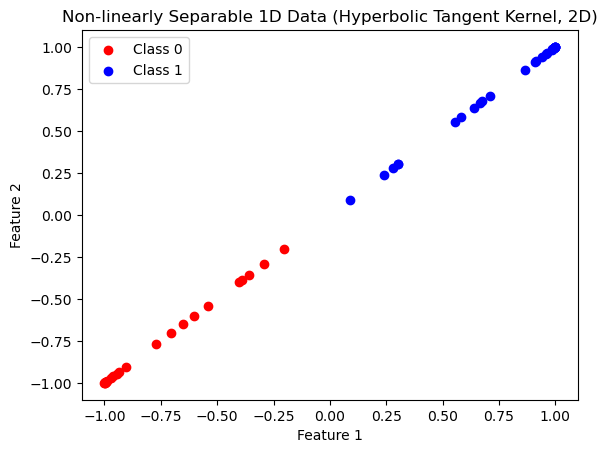

In [24]:
K = hyperbolic_tangent_kernel(X, X)

# Project points into 2-dimensional feature space
Z = np.zeros((len(X), 2))
for i in range(len(X)):
    Z[i, 0] = np.tanh(2 * X[i])
    Z[i, 1] = np.tanh(2 * X[i])

# Plot points in feature space with different colors for each class
plt.scatter(Z[y==0, 0], Z[y==0, 1], c='red', label='Class 0')
plt.scatter(Z[y==1, 0], Z[y==1, 1], c='blue', label='Class 1')

# Add legend and labels
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linearly Separable 1D Data (Hyperbolic Tangent Kernel, 2D)')

# Display plot
plt.show()




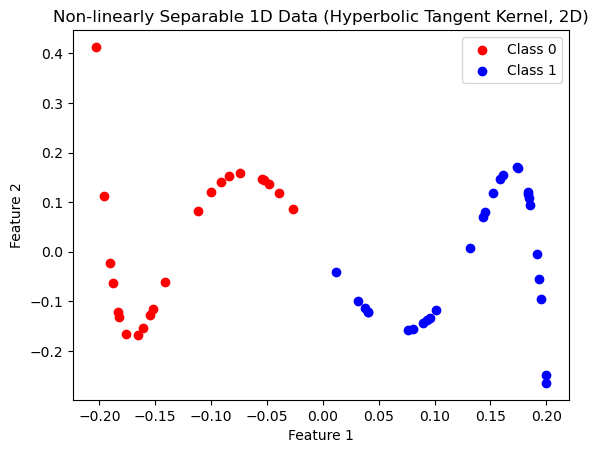

In [25]:
# Compute kernel matrix
K = hyperbolic_tangent_kernel(X, X)

# Project points into 2-dimensional feature space using eigendecomposition
eigvals, eigvecs = np.linalg.eigh(K)
idx = eigvals.argsort()[::-1][:2]
Z = eigvecs[:,idx]

# Plot points in feature space with different colors for each class
plt.scatter(Z[y==0, 0], Z[y==0, 1], c='red', label='Class 0')
plt.scatter(Z[y==1, 0], Z[y==1, 1], c='blue', label='Class 1')

# Add legend and labels
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linearly Separable 1D Data (Hyperbolic Tangent Kernel, 2D)')

# Display plot
plt.show()

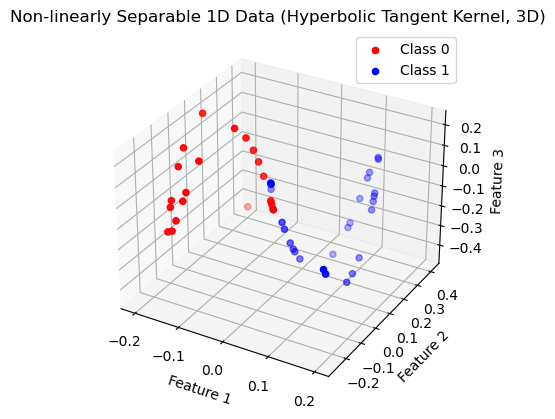

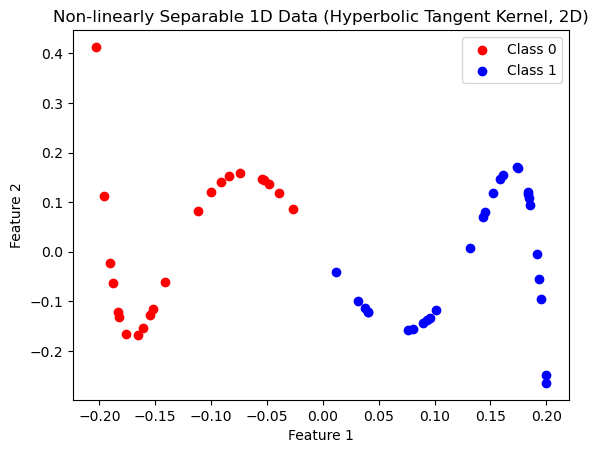

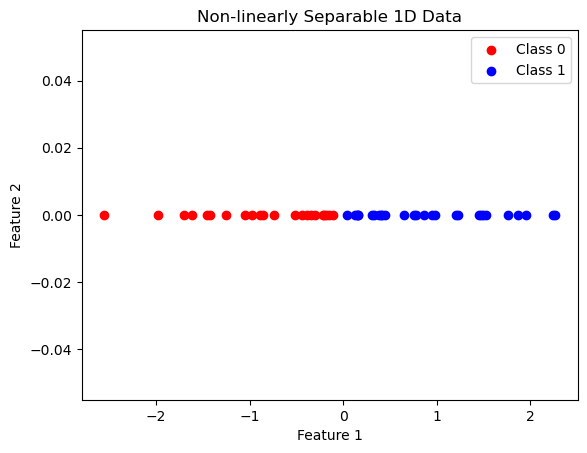

In [26]:
# Compute kernel matrix
K = hyperbolic_tangent_kernel(X, X)

# Project points into 3-dimensional feature space using eigendecomposition
eigvals, eigvecs = np.linalg.eigh(K)
idx = eigvals.argsort()[::-1][:3]
Z = eigvecs[:,idx]

# Project points into 2-dimensional feature space using eigendecomposition
idx = eigvals.argsort()[::-1][:2]
Z2d = eigvecs[:,idx]

# Plot projection in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Z[y==0, 0], Z[y==0, 1], Z[y==0, 2], c='red', label='Class 0')
ax.scatter(Z[y==1, 0], Z[y==1, 1], Z[y==1, 2], c='blue', label='Class 1')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Non-linearly Separable 1D Data (Hyperbolic Tangent Kernel, 3D)')
ax.legend()

# Plot projection in 2D
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Z2d[y==0, 0], Z2d[y==0, 1], c='red', label='Class 0')
ax.scatter(Z2d[y==1, 0], Z2d[y==1, 1], c='blue', label='Class 1')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Non-linearly Separable 1D Data (Hyperbolic Tangent Kernel, 2D)')
ax.legend()

# Plot points in feature space
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[y==0], np.zeros(np.sum(y==0)), c='red', label='Class 0')
ax.scatter(X[y==1], np.zeros(np.sum(y==1)), c='blue', label='Class 1')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_title('Non-linearly Separable 1D Data')
ax.legend()

plt.show()


Main differences between HT kernel function and Sigmoid function:
* S-shaped curves, but ranges are different. HT ranges is wider, so it might be better for capturing non-linear relationships.
* Sensitivity: Sigmoid is more prone to overfitting, especially for the gamma parameter.
* Symmetry: HT is symetric, so it is invariant to the order of the inputs. Sigmoid is not.

In theory, the projection of our data to the feature space through the hyperbolic tangent kernel function is of infinite dimension, which is not a problem due to the kernel trick in SVM, which consists of computing the dot product between pairs of data points in the feature space, that is, computing K for original datapoints. And dot product is dimensional-invariant.

Implementing SVM using a Hyperbolic Tangent (sigmoid) kernel function is equivalent to an implementation of a 2-layer perceptron neural network (with sigmoid as avtivation function), because the equation that defines the decision boundary is mathematically the same.

#### SVM in Speeddating

In [27]:
from sklearn.svm import SVC

#SVM with the hyperbolic tangent kernel function

def hyperbolic_tangent_kernel(X1, X2, gamma=0,coef0=0.0):
    K = np.tanh(gamma * np.dot(X1, X2.T) + coef0)
    return K

C=1.0 # regularization parameter

# Define SVM with hyperbolic tangent function
svm = SVC(C=C, kernel=hyperbolic_tangent_kernel)

# Train SVM on training data
svm.fit(X_train, y_train)

# Predict labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy of predictions
hypSVMaccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {hypSVMaccuracy}")

Accuracy: 0.8305084745762712


In [28]:
param_grid = {
    'gamma': [0.1, 1, 10],
    'coef0': [-1, 0, 1]
}

# Create an SVM classifier with hyperbolic tangent kernel
svm = SVC(C=C, kernel=hyperbolic_tangent_kernel)

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy score
best_params = grid_search.best_params_

# Train an SVM classifier on the full training set with the best hyperparameters
svm = SVC(C=C, kernel=hyperbolic_tangent_kernel, **best_params)
svm.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
y_pred = svm.predict(X_test)
bestHypSVMaccuracy = accuracy_score(y_test, y_pred)
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy score on test set: {bestHypSVMaccuracy}")

Best hyperparameters: {'coef0': -1, 'gamma': 0.1}
Accuracy score on test set: 0.8305084745762712


In [29]:
svm = SVC(C=C, kernel='sigmoid')

# Train SVM on training data
svm.fit(X_train, y_train)

# Predict labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy of predictions
sigAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {sigAccuracy}")

Accuracy: 0.8203389830508474


In [30]:
param_grid = {
    'gamma': [0.1, 1, 10],
    'coef0': [-1, 0, 1]
}

# Create an SVM classifier with hyperbolic tangent kernel
svm = SVC(C=C, kernel='sigmoid')

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy score
best_params = grid_search.best_params_

# Train an SVM classifier on the full training set with the best hyperparameters
svm = SVC(C=C, kernel=hyperbolic_tangent_kernel, **best_params)
svm.fit(X_train, y_train)

# Evaluate the SVM classifier on the test set
y_pred = svm.predict(X_test)
bestSigSVMaccuracy = accuracy_score(y_test, y_pred)
print(f"Best hyperparameters: {best_params}")
print(f"Accuracy score on test set: {bestSigSVMaccuracy}")

Best hyperparameters: {'coef0': -1, 'gamma': 0.1}
Accuracy score on test set: 0.8305084745762712


In [31]:
svm = SVC(C=C, kernel='linear')

# Train SVM on training data
svm.fit(X_train, y_train)

# Predict labels for test data
y_pred = svm.predict(X_test)

# Calculate accuracy of predictions
linSVMAccuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {linSVMAccuracy}")

Accuracy: 0.8305084745762712


## Results

In [44]:
# create a dictionary of data for different models
data = {'Model': ['Logistic Regression', 'Decision Tree', 'Bagging','Random Forest', 'SVM (Hyper)', 'SVM (Sigmoid)', 'SVM(Linear)'],
        'Accuracy Score': [logAccuracy, treeAccuracy , baggingAccuracy , forestAccuracy,  hypSVMaccuracy, sigAccuracy, linSVMAccuracy],
        'CS Mean Score': [logMeanScore, treeMeanScore, baggingMeanScore, forestMeanScore,0,0,0],
        'Tuned Model Accuracy': [0, bestTreeAccuracy, bestBaggingAccuracy, bestForestAccuracy, 0, bestSigSVMaccuracy,0]}


df = pd.DataFrame(data)

df.head(12)


,Model,Accuracy Score,CS Mean Score,Tuned Model Accuracy
0,Logistic Regression,0.830508,0.825682,0.000000
1,Decision Tree,0.784746,0.819749,0.852542
2,Bagging,0.861582,0.829921,0.852542
3,Random Forest,0.858757,0.842915,0.860452
4,SVM (Hyper),0.830508,0.000000,0.000000
5,SVM (Sigmoid),0.820339,0.000000,0.830508
6,SVM(Linear),0.830508,0.000000,0.000000
